#Библиотеки

In [ ]:
from google.colab import files
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, SimpleRNN
from tensorflow.python.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


#Предобработка данных

In [ ]:
# Токенизатор из библиотеки Keras

tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-./:;,<=>?@[\\]^_`{|}~\t\n0123456789', lower=True, split=' ', char_level=False)

# Метод обрабатывает тексты и собирает словарь

tokenizer.fit_on_texts(train)

# Частотные индексы (ранги слов по частоте встречаемости)

items = list(tokenizer.word_index.items())

```
Образец словаря 

[('днем', 1001), ('живут', 1002), ('одновременно', 1003), ('новые', 1004), ('вернулся', 1005), ('решение', 1006), ('действия', 1007), 
('сделали', 1008), ('зато', 1009), ('человеку', 1010), ('телефона', 1011), ('путь', 1012), ('найден', 1013), ('кровати', 1014), 
('честно', 1015), ('больно', 1016), ('ж', 1017), ('буквально', 1018), ('сознания', 1019), ('пропал', 1020), ('плиз', 1021), 
('идёт', 1022), ('полу', 1023), ('видели', 1024), ('знакомых', 1025), ('ходит', 1026), ('получить', 1027), ('знать', 1028), 
('ушла', 1029), ('iz', 1030), ('ук', 1031), ('nкто', 1032), ('сильнее', 1033), ('нашу', 1034), ('полный', 1035), ('нашёл', 1036), 
('разных', 1037), ('узнал', 1038), ('бесплатно', 1039), ('комнаты', 1040), ('поехали', 1041),  ('памяти', 1042), ('забыл', 1043), 
('ощущения', 1044), ('могли', 1045), ('думала', 1046), ('nтак', 1047), ('конца', 1048), ('количество', 1049), ('большая', 1050), 
('source', 1051), ('предложил', 1052), ('сходить', 1053), ('звоните', 1054), ('уйти', 1055), ('км', 1056), ('пришли', 1057)]

Размер словаря - 137802 слов
```



In [ ]:
# Тексты приводятся к виду последовательностей чисел
# в соответствии с индексами обучающего словаря

trainIdx = tokenizer.texts_to_sequences(train)
testIdx = tokenizer.texts_to_sequences(test)

#Обучение модели

Epoch 1/20
123/123 [==============================] - 20s 167ms/step - loss: 0.2404 - accuracy: 0.9031 - precision: 0.7645 - recall: 0.8252 - val_loss: 0.3866 - val_accuracy: 0.7982 - val_precision: 0.8618 - val_recall: 0.9157
Epoch 2/20
123/123 [==============================] - 20s 163ms/step - loss: 0.0394 - accuracy: 0.9888 - precision: 0.9057 - recall: 0.9394 - val_loss: 0.2662 - val_accuracy: 0.8779 - val_precision: 0.9269 - val_recall: 0.9551
Epoch 3/20
123/123 [==============================] - 20s 163ms/step - loss: 0.0097 - accuracy: 0.9983 - precision: 0.9424 - recall: 0.9631 - val_loss: 0.1078 - val_accuracy: 0.9563 - val_precision: 0.9514 - val_recall: 0.9696
Epoch 4/20
123/123 [==============================] - 20s 163ms/step - loss: 0.0037 - accuracy: 0.9996 - precision: 0.9591 - recall: 0.9735 - val_loss: 0.1324 - val_accuracy: 0.9486 - val_precision: 0.9638 - val_recall: 0.9770
Epoch 5/20
123/123 [==============================] - 20s 165ms/step - loss: 0.0020 - accura

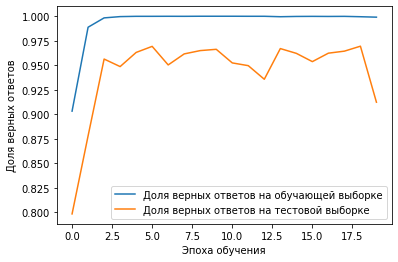

In [ ]:
# Архитектура сверточной нейросети
# Модель, основанная на Bag-of-Words

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(200, input_dim=maxWordsCount, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy', precision, recall])

history = model.fit(xTrain01,
                      yTrain,
                      epochs=20,
                      batch_size=200,
                      validation_data=(xTest01, yTest))
                      callbacks=[checkpoint])

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на тестовой выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/20
123/123 [==============================] - 3s 27ms/step - loss: 0.5013 - accuracy: 0.7758 - precision: 0.9502 - recall: 0.9679 - val_loss: 0.6156 - val_accuracy: 0.5370 - val_precision: 0.9495 - val_recall: 0.9674
Epoch 2/20
123/123 [==============================] - 3s 25ms/step - loss: 0.1100 - accuracy: 0.9588 - precision: 0.9495 - recall: 0.9674 - val_loss: 0.6683 - val_accuracy: 0.5545 - val_precision: 0.9495 - val_recall: 0.9675
Epoch 3/20
123/123 [==============================] - 3s 25ms/step - loss: 0.0392 - accuracy: 0.9874 - precision: 0.9496 - recall: 0.9676 - val_loss: 0.5053 - val_accuracy: 0.7229 - val_precision: 0.9498 - val_recall: 0.9677
Epoch 4/20
123/123 [==============================] - 3s 25ms/step - loss: 0.0188 - accuracy: 0.9938 - precision: 0.9500 - recall: 0.9678 - val_loss: 0.2576 - val_accuracy: 0.8922 - val_precision: 0.9502 - val_recall: 0.9680
Epoch 5/20
123/123 [==============================] - 3s 25ms/step - loss: 0.0101 - accuracy: 0.9971

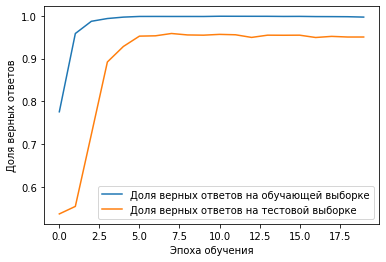

In [ ]:
# Модель c Embedding-слоем 

modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 30, input_length=xLen)) #30-мерное пространство
modelE.add(SpatialDropout1D(0.25))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation='relu'))
modelE.add(Dropout(0.25))
modelE.add(BatchNormalization())
modelE.add(Dense(2, activation='softmax'))

modelE.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy', precision, recall])

history = modelE.fit(xTrain,
                      yTrain,
                      epochs=20,
                      batch_size=200,
                      validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на тестовой выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()